# Linear Regression

In [5]:
import pandas as pd
import numpy as np 

In [6]:
df = pd.read_csv("/Users/Vatsalya/Downloads/car data.csv")
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [7]:
df.drop(df[["Car_Name","Owner"]],axis=1, inplace=True)

In [8]:
df

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual
...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual


In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
lb = LabelEncoder()
lb

LabelEncoder()

In [11]:
df["Fuel_type_n"] = lb.fit_transform(df["Fuel_Type"])
df["Seller_Type_n"] = lb.fit_transform(df["Seller_Type"])
df["Transmission_n"] = lb.fit_transform(df["Transmission"])

In [12]:
df.drop(df[["Fuel_Type","Seller_Type","Transmission"]],axis=1, inplace=True)

In [13]:
df.drop("Year",axis=1, inplace=True)

In [14]:
df

,Selling_Price,Present_Price,Kms_Driven,Fuel_type_n,Seller_Type_n,Transmission_n
0,3.35,5.59,27000,2,0,1
1,4.75,9.54,43000,1,0,1
2,7.25,9.85,6900,2,0,1
3,2.85,4.15,5200,2,0,1
4,4.60,6.87,42450,1,0,1
...,...,...,...,...,...,...
296,9.50,11.60,33988,1,0,1
297,4.00,5.90,60000,2,0,1
298,3.35,11.00,87934,2,0,1
299,11.50,12.50,9000,1,0,1


In [15]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

In [16]:
df["Selling_Price"] = mms.fit_transform(df[["Selling_Price"]])
df["Present_Price"] = mms.fit_transform(df[["Present_Price"]])
df["Kms_Driven"] = mms.fit_transform(df[["Kms_Driven"]])

In [17]:
df

,Selling_Price,Present_Price,Kms_Driven,Fuel_type_n,Seller_Type_n,Transmission_n
0,0.093123,0.057109,0.053053,2,0,1
1,0.133238,0.099913,0.085085,1,0,1
2,0.204871,0.103273,0.012813,2,0,1
3,0.078797,0.041504,0.009409,2,0,1
4,0.128940,0.070980,0.083984,1,0,1
...,...,...,...,...,...,...
296,0.269341,0.122237,0.067043,1,0,1
297,0.111748,0.060468,0.119119,2,0,1
298,0.093123,0.115735,0.175043,2,0,1
299,0.326648,0.131990,0.017017,1,0,1


In [18]:
X = df.drop("Selling_Price", axis=1)
y = df["Selling_Price"]

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [21]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [22]:
lr.fit(X_train,y_train)

LinearRegression()

In [23]:
lr.score(X_test,y_test)

0.779456311748227

In [24]:
y_pred = lr.predict(X_test)

In [25]:
resid = y_test - y_pred

In [26]:
import matplotlib.pyplot as plt

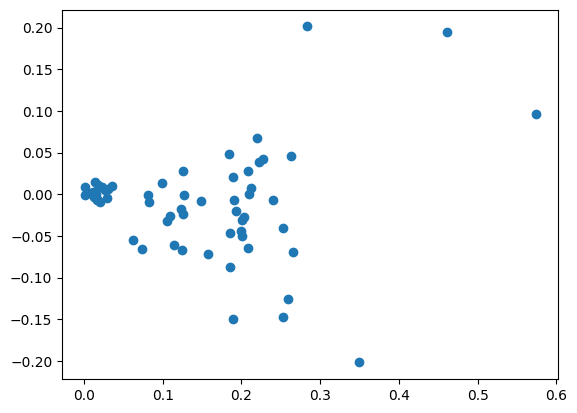

In [27]:
# Homoscedasticity
plt.scatter(y_pred,resid)

In [28]:
import scipy.stats as stats

((array([-2.28017173, -1.92017484, -1.7091256 , -1.55469152, -1.43036801,
         -1.3249031 , -1.23241216, -1.14940983, -1.07365152, -1.00360143,
         -0.93815914, -0.87650695, -0.81801894, -0.76220403, -0.70866868,
         -0.65709167, -0.60720655, -0.55878903, -0.51164772, -0.46561731,
         -0.42055328, -0.37632784, -0.33282677, -0.28994682, -0.24759369,
         -0.20568029, -0.16412527, -0.12285188, -0.08178679, -0.04085922,
          0.        ,  0.04085922,  0.08178679,  0.12285188,  0.16412527,
          0.20568029,  0.24759369,  0.28994682,  0.33282677,  0.37632784,
          0.42055328,  0.46561731,  0.51164772,  0.55878903,  0.60720655,
          0.65709167,  0.70866868,  0.76220403,  0.81801894,  0.87650695,
          0.93815914,  1.00360143,  1.07365152,  1.14940983,  1.23241216,
          1.3249031 ,  1.43036801,  1.55469152,  1.7091256 ,  1.92017484,
          2.28017173]),
  array([-2.01740205e-01, -1.49650027e-01, -1.46958752e-01, -1.25555330e-01,
         -8

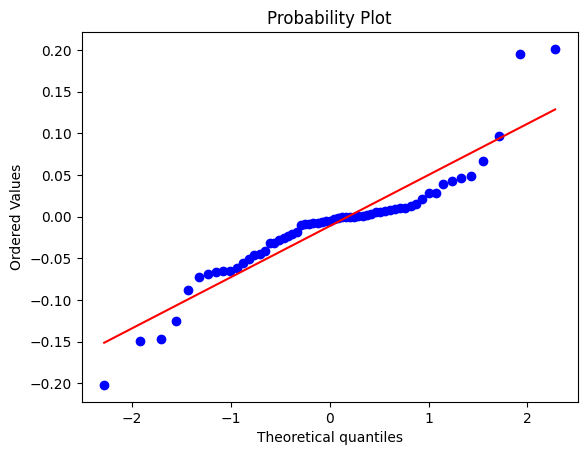

In [29]:
stats.probplot(resid, dist="norm", plot=plt)

/Users/Vatsalya/PycharmProjects/pythonProject/Business_Analytics/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Selling_Price', ylabel='Count'>

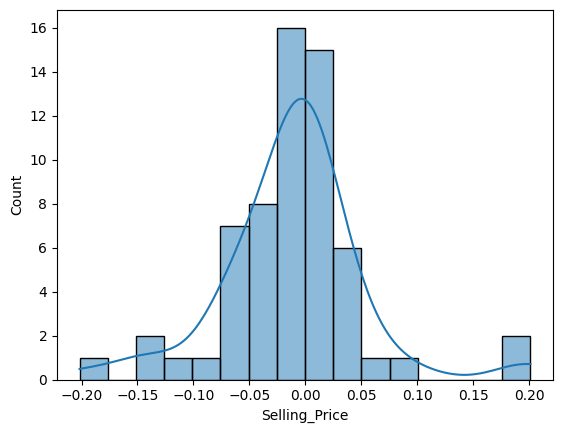

In [30]:
import seaborn as sns
sns.histplot(resid, kde=True)

/Users/Vatsalya/PycharmProjects/pythonProject/Business_Analytics/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


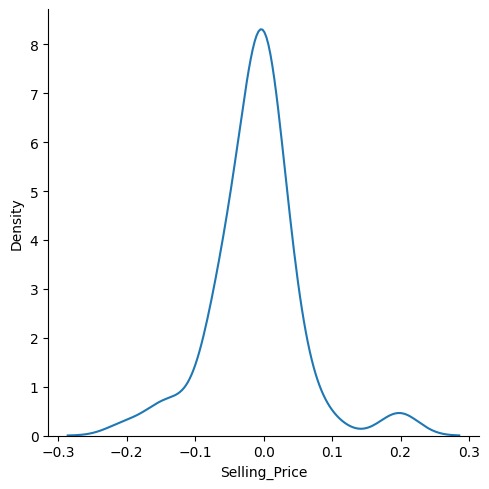

In [31]:
sns.displot(resid, kind="kde")

In [32]:
import scipy as stats

In [33]:
n = len(X_train)
p = 5
df = n-p-5
df

230

In [34]:
from sklearn.metrics import mean_squared_error

In [35]:
import statsmodels.api as sm

In [36]:
x_with_constant = sm.add_constant(X_train)

In [37]:
model = sm.OLS(y_train, sm.add_constant(X_train)).fit()

In [40]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     264.6
Date:                Fri, 15 Dec 2023   Prob (F-statistic):           3.80e-94
Time:                        01:04:23   Log-Likelihood:                 346.51
No. Observations:                 240   AIC:                            -681.0
Df Residuals:                     234   BIC:                            -660.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2059      0.025      8.314      0.000       0.157       0.255
Present_Price      1.1345      0.050     22.577      0.000       1.036       1.234
Kms_Driven        -0.2780      0.046     -6.023      0.000      -0.369      -0.187
Fuel_type_n       -0.0445      0.010     -4.400      0.000      -0.064      -0.025
Seller_Type_n     -0.0444      0.009     -4.897      0.000      -0.062      -0.027
Transmission_n    -0.0545      0.012     -4.442      0.000      -0.079      -0.030
==============================================================================
Omnibus:                       66.775   Durbin-Watson:                   2.141
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              630.849
Skew:                           0.764   Prob(JB):                    1.03e-137
Kurtosis:                      10.794   Cond. No.                         32.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
for i in range(len(model.pvalues)):
    if model.pvalues[i]<0.1:
        print(model.pvalues[i])

7.582389713936417e-15
1.1030320620310502e-60
6.597355516393169e-09
1.644433833925765e-05
1.8123877845261796e-06
1.3760829435158116e-05


/var/folders/tp/k_l14k8x5qjfzkww46mbsy4w0000gp/T/ipykernel_26618/617142771.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if model.pvalues[i]<0.1:
/var/folders/tp/k_l14k8x5qjfzkww46mbsy4w0000gp/T/ipykernel_26618/617142771.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(model.pvalues[i])
